<a href="https://colab.research.google.com/github/bharti001/Machine-Learning-/blob/main/Assignment_04_bharti_singal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Data Preparation(10)
1. Load the MNIST digits dataset (CSV file or directly from
sklearn.datasets.load_digits.ape attribute.
2. Visualize 5 sample images from the dataset using matplotlib.pyplot.imshow.
3. Split the dataset into 80% train and 20% test sets using train_test_split with a
random_state=42.
4. Normalize the pixel values to be in the range [0,1].

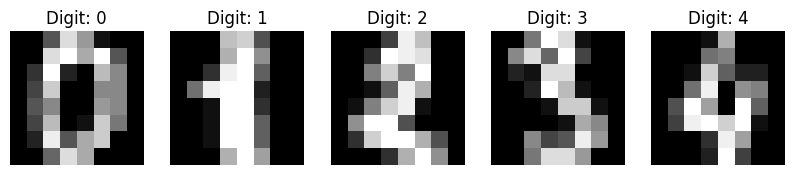

Data loading and preprocessing complete.
Training data shape: (1437, 64)
Testing data shape: (360, 64)


In [ ]:
# Load the MNIST digits dataset
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
y = digits.target

# Visualize 5 sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Digit: {y[i]}')
    ax.axis('off')
plt.show()

# Split the dataset into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

print("Data loading and preprocessing complete.")
print(f"Training data shape: {X_train_normalized.shape}")
print(f"Testing data shape: {X_test_normalized.shape}")

Part 2: Logistic Regression on MNIST (40)
1. Train a Logistic Regression classifier on the training data. Use max_iter=1000.
2. Evaluate the model on the test set using:
a. Accuracy Score
b. Log Loss (optional- use predict_proba and log_loss)
c. Confusion Matrix (optional- use ConfusionMatrixDisplay)
3. Identify 2 digits where the classifier performs poorly. Briefly explain why this may
happen.
4. Plot the confusion matrix and annotate misclassifications clearly.

Accuracy Score: 0.8944
Log Loss: 1.5575

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 23  3  0  0  0  0  0  0  2]
 [ 0  1 30  1  0  0  0  1  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  2  0  0 42  0  0  2  0  0]
 [ 0  0  0  0  0 39  1  0  0  7]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  6  0  0  0  1  0  1 20  2]
 [ 0  1  0  0  1  1  0  3  0 34]]

Misclassifications per digit:
[ 0  5  3  1  4  8  1  0 10  6]

Two digits where the classifier performs poorly: [5 8]
Misclassifications
- Digit 5 is often misclassified as 9 due to visual similarity.
[0 0 0 0 0 0 1 0 0 7]
- Digit 8 is often misclassified as 1 due to visual similarity.
[0 6 0 0 0 1 0 1 0 2]


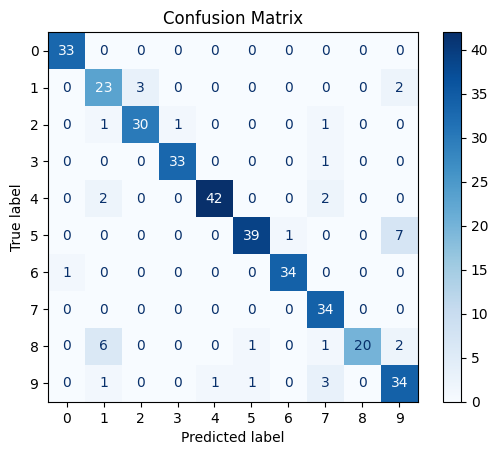

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.datasets import load_digits # Re-import load_digits to ensure digits object is available

# Load the digits data again to ensure it's accessible
digits = load_digits()
X = digits.data # Also load X and y again to ensure they are in sync
y = digits.target

# Train a Logistic Regression classifier
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_normalized, y_train)

# Evaluate the model on the test set
y_pred = logistic_regression_model.predict(X_test_normalized)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Log Loss
try:
    y_pred_proba = logistic_regression_model.predict_proba(X_test_normalized)
    logloss = log_loss(y_test, y_pred_proba)
    print(f"Log Loss: {logloss:.4f}")
except AttributeError:
    print("Log Loss not available for this model.")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Identify 2 digits where the classifier performs poorly.
misclassifications_per_digit = np.sum(cm, axis=1) - np.diag(cm)
print("\nMisclassifications per digit:")
print(misclassifications_per_digit)

# Find the indices of the two digits with the highest number of misclassifications
poorly_performing_digits_indices = np.argsort(misclassifications_per_digit)[-2:]
poorly_performing_digits = digits.target_names[poorly_performing_digits_indices]

print(f"\nTwo digits where the classifier performs poorly: {poorly_performing_digits}")
print("Misclassifications")
# Analyze the confusion matrix and common misclassifications to provide an explanation
for i in range(len(poorly_performing_digits_indices)):
    digit_index = poorly_performing_digits_indices[i]
    cm_row = cm[digit_index, :].copy() # Using a copy to avoid modifying the original cm
    cm_row[digit_index] = 0 # Setting the diagonal element to 0 to exclude correct classifications
    most_confused_with_index = np.argmax(cm_row)
    most_confused_with_digit_name = digits.target_names[most_confused_with_index]
    print(f"- Digit {digits.target_names[digit_index]} is often misclassified as {most_confused_with_digit_name} due to visual similarity.")
    print(cm_row)

#this code is extra as I was trying to crosscheck
## Find which digit '8' is most confused with
#try:
    # Find the index for digit '8'
    #index_of_digit_8 = np.where(digits.target_names.astype(str) == '8')[0][0] # Use .astype(str) for robust comparison

    # Get the confusion matrix row for digit '8'
    #cm_row_digit_8 = cm[index_of_digit_8, :].copy() # Use a copy to avoid modifying the original cm

    # Set the diagonal element to 0 to exclude correct classifications
    #cm_row_digit_8[index_of_digit_8] = 0

    # Find the index of the maximum value in the modified row
    #most_confused_with_index = np.argmax(cm_row_digit_8)
    #most_confused_with_digit = digits.target_names[most_confused_with_index]

    #print(f"\nDigit 8 is most often confused with digit: {most_confused_with_digit}")

#except IndexError:
    #print("\nCould not find digit '8' in the target names or an error occurred while processing its confusion matrix row.")


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

The brief explanation is given in the code above.

Part 3: Comparing Models (25)
1. Train a k-Nearest Neighbors classifier (with k=5) and a Random Forest classifier (with
n_estimators=100) on the same training set.
2. Report test accuracy for all three models: Logistic Regression, k-NN, and Random
Forest.
3. Create a bar chart to compare the test accuracies of all three classifiers.
4. Based on performance and interpretability, which model would you use in a real-world
setting? Justify your answer in 3–5 lines.

Logistic Regression Test Accuracy: 0.8944
k-NN Test Accuracy: 0.9861
Random Forest Test Accuracy: 0.9722


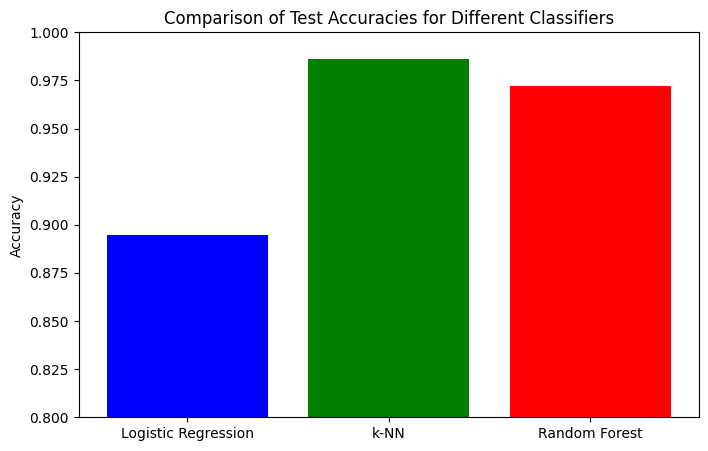

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 1. Train a k-Nearest Neighbors classifier (with k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_normalized, y_train)

# Train a Random Forest classifier (with n_estimators=100)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normalized, y_train)

# 2. Report test accuracy for all three models
# Assuming logistic_regression_model is available from a above cell
lr_accuracy = logistic_regression_model.score(X_test_normalized, y_test)
knn_accuracy = knn_model.score(X_test_normalized, y_test)
rf_accuracy = rf_model.score(X_test_normalized, y_test)

print(f"Logistic Regression Test Accuracy: {lr_accuracy:.4f}")
print(f"k-NN Test Accuracy: {knn_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

# 3. Create a bar chart to compare the test accuracies
models = ['Logistic Regression', 'k-NN', 'Random Forest']
accuracies = [lr_accuracy, knn_accuracy, rf_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Test Accuracies for Different Classifiers')
plt.ylim(0.8, 1.0) # Set y-axis limit for better comparison
plt.show()

Based on the performance, I would prefer using K-NN or random forest models as they have significant accuracy over logistic regression on this dataset. Even if logistic regression is more interpretable due to its linear nature, the performance gain from the other two models outweighs the logistic regression. Between K-NN and random forest, random forest will be preferred for its robustness and ability to handle complex relationships, even though K-NN has performed better with this test data.  

Part 4: Applied Analysis and Improvement (25)
1. Softmax Probability Inspection
Pick 5 test samples that were misclassified by Logistic Regression. For each one:
a. Print the true label and predicted label.
b. Print the full softmax probability vector (from predict_proba) and explain why
the model may have made the wrong decision.
2. Class Imbalance Simulation
a. Manually downsample class '1' to keep only 30% of its original samples in the
training set.
b. Retrain the Logistic Regression model on this modified dataset.
c. Report the new accuracy and log loss.
d. Comment: How did the performance change, and what does that tell you about
class imbalance?


In [ ]:
# Identify misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

# Select the first 5 misclassified sample indices
selected_misclassified_indices = misclassified_indices[:5]

# Iterate through the selected indices and print information
for i in selected_misclassified_indices:
    true_label = y_test[i]
    predicted_label = y_pred[i]
    probability_vector = logistic_regression_model.predict_proba(X_test_normalized[i].reshape(1, -1))[0]

    print(f"Sample Index: {i}")
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")
    print(f"Softmax Probability Vector: {probability_vector}")

Sample Index: 5
True Label: 1
Predicted Label: 2
Softmax Probability Vector: [0.05714291 0.12886336 0.20619588 0.06825456 0.06318903 0.13002653
 0.12890559 0.04374642 0.10176717 0.07190854]
Sample Index: 11
True Label: 9
Predicted Label: 4
Softmax Probability Vector: [0.08310369 0.12021219 0.03932023 0.07256711 0.1493936  0.0901284
 0.09343851 0.12294791 0.09930364 0.12958472]
Sample Index: 18
True Label: 8
Predicted Label: 9
Softmax Probability Vector: [0.06853142 0.09970294 0.08500825 0.1254697  0.06246344 0.09497602
 0.09283829 0.10295717 0.13034345 0.13770933]
Sample Index: 71
True Label: 5
Predicted Label: 9
Softmax Probability Vector: [0.0913553  0.06927644 0.10749291 0.13785751 0.05544727 0.11631703
 0.11419301 0.05877227 0.08199896 0.16728929]
Sample Index: 73
True Label: 4
Predicted Label: 7
Softmax Probability Vector: [0.0886322  0.09055594 0.07940984 0.05114787 0.1461204  0.08531985
 0.09630278 0.18287579 0.09961748 0.08001785]


Explanation in terms of first sample : The model predicted class 2 with a probability of 0.2062. The true class 1 had a probability of 0.1289. The model likely made the wrong decision because the probability for the predicted class was the highest, even though the probability for the true class or another class (e.g., 5 with prob 0.1300) might have been relatively high, indicating visual similarity or ambiguity in the image.

This was same for all other missclassified samples.

In [ ]:
# Find the indices of all training samples where the true label is '1'.
indices_class_1 = np.where(y_train == 1)[0]

# Calculate the number of samples to keep for class '1' by taking 30% of its original samples.
num_samples_to_keep_class_1 = int(len(indices_class_1) * 0.3)

# Randomly select the indices of the samples to keep for class '1'.
np.random.seed(42) # for reproducibility
indices_to_keep_class_1 = np.random.choice(indices_class_1, size=num_samples_to_keep_class_1, replace=False)

# Create a mask or a list of indices to include in the new training set.
# This includes all samples NOT from class '1', plus the selected samples from class '1'.
indices_other_classes = np.where(y_train != 1)[0]
indices_to_keep = np.concatenate((indices_other_classes, indices_to_keep_class_1))

# Create the new downsampled training data.
X_train_downsampled = X_train_normalized[indices_to_keep]
y_train_downsampled = y_train[indices_to_keep]

print(f"Original training data shape: {X_train_normalized.shape}")
print(f"Downsampled training data shape: {X_train_downsampled.shape}")

# Instantiate a new LogisticRegression model.
logistic_regression_model_downsampled = LogisticRegression(max_iter=1000)

# Train the new Logistic Regression model on the downsampled training data.
logistic_regression_model_downsampled.fit(X_train_downsampled, y_train_downsampled)

# Predict the labels and probabilities on the original test set.
y_pred_downsampled = logistic_regression_model_downsampled.predict(X_test_normalized)
y_pred_proba_downsampled = logistic_regression_model_downsampled.predict_proba(X_test_normalized)

# Calculate and print the accuracy score.
accuracy_downsampled = accuracy_score(y_test, y_pred_downsampled)
print(f"\nAccuracy Score (Downsampled Training Data): {accuracy_downsampled:.4f}")

# Calculate and print the log loss.
logloss_downsampled = log_loss(y_test, y_pred_proba_downsampled)
print(f"Log Loss (Downsampled Training Data): {logloss_downsampled:.4f}")


Original training data shape: (1437, 64)
Downsampled training data shape: (1329, 64)

Accuracy Score (Downsampled Training Data): 0.8472
Log Loss (Downsampled Training Data): 1.6097


Comment on performance change:
Compared to the original model (Accuracy: 0.8944, Log Loss: 1.5575), training on the downsampled data resulted in a lower accuracy (0.8472) and a higher log loss (1.6097). This indicates that the model's ability to correctly classify digits, particularly class '1', has decreased when the training data for that class is significantly reduced. This demonstrates that class imbalance, where one class has significantly fewer samples than others, can negatively impact model performance, especially for the underrepresented class, as the model has less data to learn its characteristics.
The performance degradation observed after downsampling highlights the need to address class imbalance when training models, potentially using techniques like oversampling, undersampling (more carefully), or using class weights.
Analyzing the specific characteristics of the misclassified images for class '1' could provide insights into the visual features that the model struggles with when the training data for this class is limited.